In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit2.csv")

In [ ]:
data.head()

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),"Rating\n(1=lowest, 5=highest)",Education\n(Highest\nDegree)
0,N0001,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1995,NaN,NaN,NaN,3,MA/MS
1,N0002,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,13-09-1994,NaN,NaN,NaN,4,MA/MS
2,N0003,31-12-2016,Active,1,26-05-2016,Yes,NaN,No,NaN,26-05-2016,NaN,19-04-1996,NaN,NaN,NaN,3,BA/BS
3,N0004,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,21-01-1994,NaN,NaN,NaN,3,BA/BS
4,N0005,31-12-2016,Active,1,06-02-2016,Yes,NaN,No,NaN,06-02-2016,NaN,18-05-1993,NaN,NaN,NaN,3,BA/BS


In [ ]:
data.describe


<bound method NDFrame.describe of      Employee ID  ... Education\n(Highest\nDegree)
0          N0001  ...                        MA/MS
1          N0002  ...                        MA/MS
2          N0003  ...                        BA/BS
3          N0004  ...                        BA/BS
4          N0005  ...                        BA/BS
...          ...  ...                          ...
2788       N2589  ...                        MA/MS
2789       N2590  ...                        BA/BS
2790       N2591  ...                          MBA
2791       N2592  ...                        BA/BS
2792       N2593  ...                        BA/BS

[2793 rows x 17 columns]>

In [ ]:
data.isnull().sum()

Employee ID                                             0
Data Effective Date                                     0
Employee\nStatus\n                                      0
Career Level \n(1=lowest, 6=highest)\n                  0
Hired Date                                              0
Hired in FY\n(Yes/No)                                   0
Termination Date                                     2180
Terminated\nin FY\n(Yes/No)                             0
Termination Type\n(Voluntary or Involuntary Exit)    2180
Job Start Date                                          0
Promoted\nin FY\n(Yes/No)                             345
Birth Date                                              0
Age\n(Years)                                         2793
Tenure\n(Years)                                      2793
Time in\nJob (Years)                                 2793
Rating\n(1=lowest, 5=highest)                           0
Education\n(Highest\nDegree)                            0
dtype: int64

In [ ]:
data.columns

Index(['Employee ID', 'Data Effective Date', 'Employee\nStatus\n',
       'Career Level \n(1=lowest, 6=highest)\n', 'Hired Date',
       'Hired in FY\n(Yes/No)', 'Termination Date',
       'Terminated\nin FY\n(Yes/No)',
       'Termination Type\n(Voluntary or Involuntary Exit)', 'Job Start Date',
       'Promoted\nin FY\n(Yes/No)', 'Birth Date', 'Age\n(Years)',
       'Tenure\n(Years)', 'Time in\nJob (Years)',
       'Rating\n(1=lowest, 5=highest)', 'Education\n(Highest\nDegree)'],
      dtype='object')

In [ ]:
data.columns=['Employee_ID', 'DataEDate', 'Employee_Status','Career_Level', 'Hired_Date','HiredIn_FY', 'Termination_Date','TerminatedIn_FY','Termination_Type', 'Job_StartDate',
       'PromotedIn_FY', 'Birth_Date', 'Age','Tenure', 'TimeIn_Job', 'Rating','Education']

In [ ]:
data['NewTerminationDate']= data['Termination_Date'].fillna(data["DataEDate"])


In [ ]:
data['Birth_Date'] = pd.to_datetime(data['Birth_Date'])
data['DataEDate'] = pd.to_datetime(data['DataEDate'])
data['Job_StartDate'] = pd.to_datetime(data['Job_StartDate'])
data['Hired_Date'] = pd.to_datetime(data['Hired_Date'])
data['Termination_Date'] = pd.to_datetime(data['Termination_Date'])

In [ ]:
data['Age'] = (data['DataEDate'] - data['Birth_Date'])
data['Age'] = round((data['Age'].astype('timedelta64[D]'))/365,1)


In [ ]:
# def date_to_year(row):
#   return int(row["DataEDate"].split("-")[2])-int(row["Birth_Date"].split("-")[2])
# data["Age"]=data.apply(date_to_year, axis=1)  

# def tenure(row):
#   return int(row["NewTerminationDate"].split("-")[2])-int(row["Job_StartDate"].split("-")[2])
# data["Tenure"]=data.apply(tenure, axis=1)  

# def timeinjob(row):
#   return int(row["NewTerminationDate"].split("-")[2])- int(row["Hired_Date"].split("-")[2])
# data["TimeIn_Job"] = data.apply(timeinjob, axis=1) 

data['NewTerminationDate'] = data['Termination_Date'].fillna(data['DataEDate'])
data['NewTerminationDate'] = pd.to_datetime(data['NewTerminationDate'])

data['Tenure'] = (data['NewTerminationDate'] - data['Hired_Date'])
data['Tenure'] = round((data['Tenure'].astype('timedelta64[D]'))/365,1)

data['TimeIn_Job'] = (data['NewTerminationDate'] - data['Job_StartDate'])
data['TimeIn_Job'] = round((data['TimeIn_Job'].astype('timedelta64[D]'))/365,1)

data.drop('NewTerminationDate', axis='columns', inplace=True)

In [ ]:
data.isnull().sum()

Employee_ID            0
DataEDate              0
Employee_Status        0
Career_Level           0
Hired_Date             0
HiredIn_FY             0
Termination_Date    2180
TerminatedIn_FY        0
Termination_Type    2180
Job_StartDate          0
PromotedIn_FY        345
Birth_Date             0
Age                    0
Tenure                 0
TimeIn_Job             0
Rating                 0
Education              0
dtype: int64

### **Visualization**

Employee Distribution- Carrer Level Wise (Active Employees)

In [ ]:
data_active = data[data.Termination_Date.isnull()]   
per_careerlevel= np.round((data_active["Career_Level"].value_counts(normalize=True)*100))
per_careerlevel

2    29.0
3    23.0
4    18.0
1    14.0
5    11.0
6     5.0
Name: Career_Level, dtype: float64

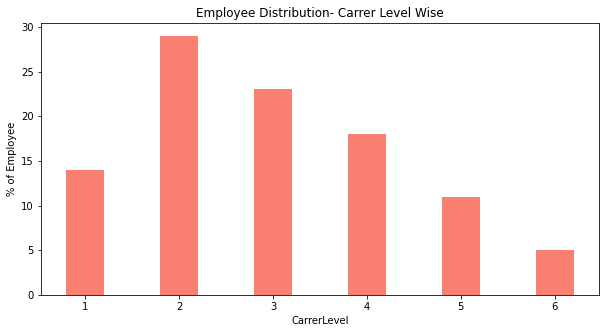

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(per_careerlevel.keys().values, per_careerlevel.to_numpy(), color ='salmon', width = 0.4) 
plt.xlabel("CarrerLevel") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Carrer Level Wise") 
plt.show()

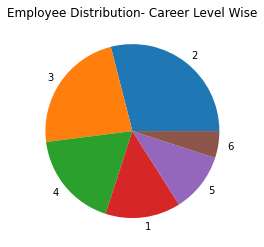

In [ ]:
plt.pie(per_careerlevel.to_numpy(), labels = per_careerlevel.keys().values) 
plt.title("Employee Distribution- Career Level Wise")  
plt.show()

In [ ]:
f = lambda x : np.round(x/x.sum() * 100)
con_sector = data_active.groupby(['Career_Level', 'Rating'])['Career_Level'].count().unstack().apply(f, axis=1)
con_sector

Rating,3,4,5
Career_Level,,,
1,65.0,35.0,NaN
2,43.0,34.0,23.0
3,18.0,32.0,50.0
4,16.0,46.0,38.0
5,7.0,61.0,32.0
6,NaN,80.0,20.0


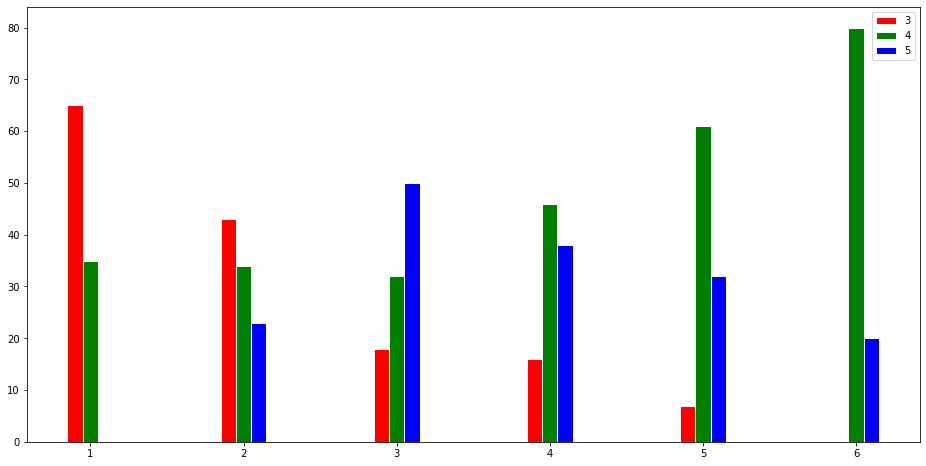

In [21]:
fig = plt.figure(figsize = (16, 8))
# set width of bar
barWidth = 0.1
# set height of bar
bars1 = con_sector.to_numpy()[:,0]
bars2 = con_sector.to_numpy()[:,1]
bars3 = con_sector.to_numpy()[:,2]



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=con_sector.columns.values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=con_sector.columns.values[1])
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label=con_sector.columns.values[2])


# Add xticks on the middle of the group bars
#plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ('1','2','3','4','5',6))
 
# Create legend & Show graphic
plt.legend()
plt.show()


Employee Termination- Carrer Level Wise (Terminated Employees)

In [22]:
data_inactive = pd.notnull(data["Termination_Date"])
data_inactive = data[data_inactive]
TerminationLevel_cnt =np.round((data_inactive['Career_Level'].value_counts(normalize=True)* 100 ))
TerminationLevel_cnt

4    33.0
2    26.0
3    24.0
5     8.0
1     7.0
6     2.0
Name: Career_Level, dtype: float64

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(TerminationLevel_cnt.keys().values, TerminationLevel_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("CareerLevel") 
plt.ylabel("% of Employee") 
plt.title("Employee Termination- Career Level Wise") 
plt.show()

In [23]:
f = lambda x : np.round(x/x.sum() * 100)
con_sector = data_inactive.groupby(['Career_Level', 'Rating'])['Career_Level'].count().unstack().apply(f, axis=1)
con_sector

Rating,1,2,3
Career_Level,,,
1,9.0,91.0,NaN
2,7.0,89.0,4.0
3,3.0,91.0,5.0
4,NaN,67.0,33.0
5,NaN,70.0,30.0
6,NaN,50.0,50.0


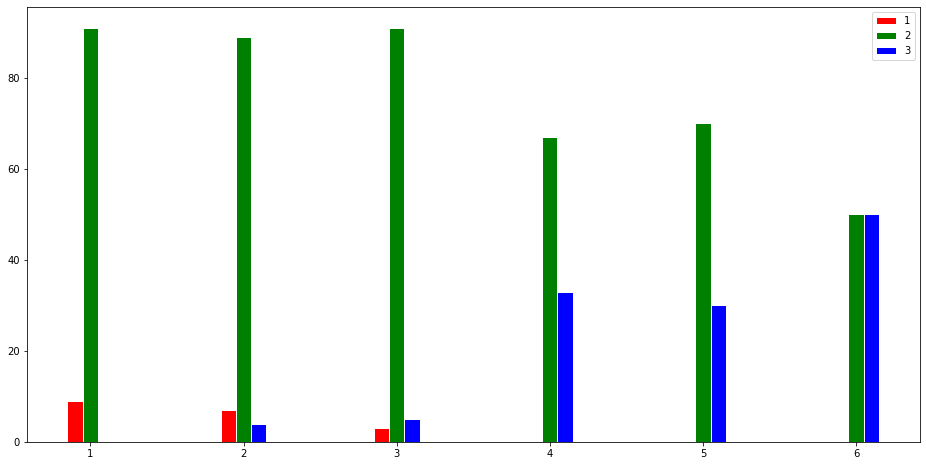

In [25]:
fig = plt.figure(figsize = (16, 8))
# set width of bar
barWidth = 0.1
# set height of bar
bars1 = con_sector.to_numpy()[:,0]
bars2 = con_sector.to_numpy()[:,1]
bars3 = con_sector.to_numpy()[:,2]




# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label=con_sector.columns.values[0])
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label=con_sector.columns.values[1])
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label=con_sector.columns.values[2])


 
# Add xticks on the middle of the group bars
#plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ('1','2','3','4','5',6))
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [26]:
TerminationType_cnt =np.round((data_inactive['Termination_Type'].value_counts(normalize=True)* 100 ))
TerminationType_cnt

Involuntary Exit    63.0
Voluntary Exit      37.0
Name: Termination_Type, dtype: float64

In [ ]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(TerminationType_cnt.keys().values, TerminationType_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("Termination Type") 
plt.ylabel("% of Employee") 
plt.title("Employee Termination- Type Wise") 
plt.show()

In [27]:
TerminationInFY_cnt =np.round((data['TerminatedIn_FY'].value_counts(normalize=True)* 100 ))
TerminationInFY_cnt

No     78.0
Yes    22.0
Name: TerminatedIn_FY, dtype: float64

In [28]:
f = lambda x : np.round(x/x.sum() * 100)
con_term = data.groupby(['Career_Level', 'TerminatedIn_FY'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_term

TerminatedIn_FY,No,Yes
Career_Level,,
1,87.0,13.0
2,80.0,20.0
3,77.0,23.0
4,67.0,33.0
5,83.0,17.0
6,91.0,9.0


In [29]:
PromotedInFY_cnt =np.round((data['PromotedIn_FY'].value_counts(normalize=True)* 100 ))
PromotedInFY_cnt


No     73.0
Yes    27.0
Name: PromotedIn_FY, dtype: float64

In [30]:
f = lambda x : np.round(x/x.sum() * 100)
con_prom = data.groupby(['Career_Level', 'PromotedIn_FY'])['PromotedIn_FY'].count().unstack().apply(f, axis=1)
con_prom

PromotedIn_FY,No,Yes
Career_Level,,
2,79.0,21.0
3,61.0,39.0
4,75.0,25.0
5,73.0,27.0
6,82.0,18.0


In [31]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['PromotedIn_FY', 'TerminatedIn_FY'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

TerminatedIn_FY,No,Yes
PromotedIn_FY,,
No,68.0,32.0
Yes,100.0,NaN


In [32]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['PromotedIn_FY', 'Rating'])['PromotedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

Rating,1,2,3,4,5
PromotedIn_FY,,,,,
No,1.0,25.0,31.0,43.0,NaN
Yes,NaN,NaN,NaN,3.0,97.0


In [33]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['TerminatedIn_FY', 'Rating'])['TerminatedIn_FY'].count().unstack().apply(f, axis=1)
con_p_term

Rating,1,2,3,4,5
TerminatedIn_FY,,,,,
No,NaN,NaN,29.0,41.0,30.0
Yes,3.0,80.0,16.0,NaN,NaN


In [34]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['TerminatedIn_FY', 'Rating',"Termination_Type"])['Rating'].count().unstack().apply(f, axis=1)
con_p_term

Termination_Type        Involuntary Exit  Voluntary Exit
TerminatedIn_FY Rating                                  
Yes             1                  100.0             NaN
                2                   74.0            26.0
                3                    NaN           100.0

In [35]:
per_Emp_status= np.round((data["Employee_Status"].value_counts(normalize=True)*100))
per_Emp_status

Active        78.0
Terminated    22.0
Name: Employee_Status, dtype: float64

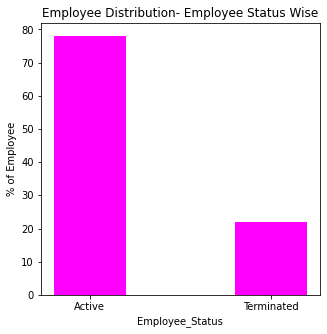

In [36]:
fig = plt.figure(figsize = (5, 5)) 
plt.bar(per_Emp_status.keys().values, per_Emp_status.to_numpy(), color ='fuchsia', width = 0.4) 
plt.xlabel("Employee_Status") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Employee Status Wise") 
plt.show()

In [37]:
per_rating= np.round((data["Rating"].value_counts(normalize=True)*100))
per_rating

4    32.0
3    26.0
5    23.0
2    18.0
1     1.0
Name: Rating, dtype: float64

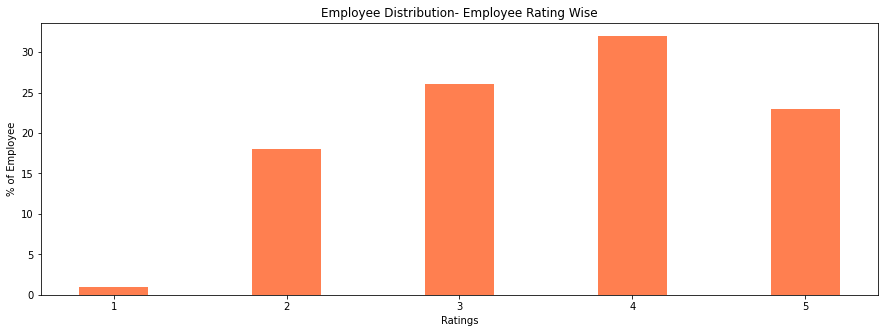

In [38]:
fig = plt.figure(figsize = (15, 5)) 
plt.bar(per_rating.keys().values, per_rating.to_numpy(), color ='coral', width = 0.4) 
plt.xlabel("Ratings") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Employee Rating Wise") 
plt.show()

In [39]:
per_edu= np.round((data["Education"].value_counts(normalize=True)*100))
per_edu

BA/BS    43.0
MA/MS    25.0
MBA      24.0
PhD       5.0
JD        3.0
Name: Education, dtype: float64

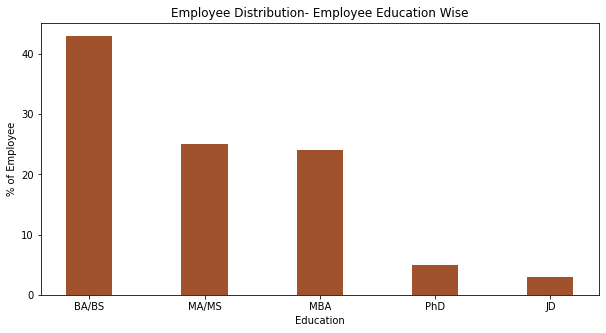

In [40]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(per_edu.keys().values, per_edu.to_numpy(), color ='sienna', width = 0.4) 
plt.xlabel("Education") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Employee Education Wise") 
plt.show()

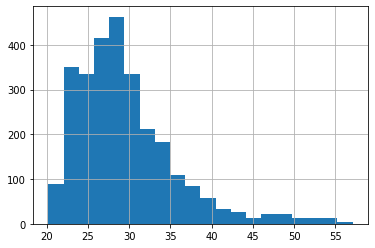

In [41]:
data['Age'].hist(bins =20);

In [44]:
data['AgeGroups']=pd.cut(data.Age,np.arange(20, 70, 5))

In [45]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['AgeGroups', 'Rating'])['Rating'].count().unstack().apply(f, axis=1)
con_p_term

Rating,1,2,3,4,5
AgeGroups,,,,,
"(20, 25]",1.0,12.0,47.0,30.0,9.0
"(25, 30]",1.0,20.0,24.0,26.0,27.0
"(30, 35]",0.0,21.0,18.0,28.0,32.0
"(35, 40]",0.0,17.0,14.0,49.0,20.0
"(40, 45]",0.0,14.0,11.0,55.0,21.0
"(45, 50]",0.0,0.0,0.0,73.0,27.0
"(50, 55]",0.0,11.0,9.0,74.0,6.0
"(55, 60]",0.0,33.0,33.0,33.0,0.0
"(60, 65]",NaN,NaN,NaN,NaN,NaN


In [54]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['AgeGroups',  'Termination_Type'])['Termination_Type'].count().unstack().apply(f, axis=1)
con_p_term

Termination_Type,Involuntary Exit,Voluntary Exit
AgeGroups,,
"(20, 25]",84.0,16.0
"(25, 30]",71.0,29.0
"(30, 35]",46.0,54.0
"(35, 40]",47.0,53.0
"(40, 45]",67.0,33.0
"(45, 50]",NaN,NaN
"(50, 55]",57.0,43.0
"(55, 60]",50.0,50.0
"(60, 65]",NaN,NaN


In [47]:
data['TenureGroups']=pd.cut(data.Tenure,np.arange(0, 35, 5))

In [55]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = data.groupby(['TenureGroups',  'Termination_Type'])['Termination_Type'].count().unstack().apply(f, axis=1)
con_p_term

Termination_Type,Involuntary Exit,Voluntary Exit
TenureGroups,,
"(0, 5]",51.0,49.0
"(5, 10]",90.0,10.0
"(10, 15]",77.0,23.0
"(15, 20]",68.0,32.0
"(20, 25]",NaN,NaN
"(25, 30]",75.0,25.0
